In [1]:
import numpy as np
import pylab as pl
import cmath

In [2]:
def n(omega):
    if(omega>1e14):
        t=100
        a1=4.582
        a2=0.09921
        a3=0.2109
        a4=-0.02194
        b1=0.00000022971
        b2=0.000000052716
        b3=-0.000000049143
        c=88506.25
        t1=t+273.15
        
        w=(2*np.pi*3e8/omega)*1e6
        c1=w*w-(a3+b3*(t1*t1-c))*(a3+b3*(t1*t1-c))
        c2=a1+b1*(t1*t1-c)+(a2+b2*(t1*t1-c))/c1+a4*w*w
        y=np.sqrt(c2)
    
    else:
        d1=19.9
        d2=44
        d3=4.533e12*2*np.pi
        d4=0.426e12*2*np.pi
        d5=2.9176e13
        
        e=d1+(d2-d1)*d5**2/(d3**2+1.0j*omega*d4-omega**2)
        y=np.real(np.sqrt(e))

    return y

#波矢
def kk(f):
    z=f*n(f)/3e8
    return z

In [3]:
inList= [-1.0000, -1.0000, -1.0000,  1.0000, -1.0000,  1.0000,  1.0000, -1.0000,
         1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000,  1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000,  1.0000, -1.0000, -1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -1.0000,  1.0000,  1.0000,
         1.0000, -1.0000, -1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -1.0000, -1.0000,
         1.0000, -0.9999, -1.0000,  1.0000,  1.0000, -0.9999,  1.0000,  1.0000,
        -1.0000,  1.0000, -1.0000,  1.0000, -1.0000, -1.0000,  1.0000, -1.0000,
         1.0000,  1.0000, -1.0000,  1.0000,  1.0000,  1.0000, -1.0000,  1.0000,
        -1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -1.0000,  1.0000,
        -1.0000,  1.0000, -1.0000, -1.0000, -1.0000,  1.0000,  1.0000,  1.0000,
        -1.0000, -1.0000, -1.0000,  1.0000,  1.0000,  1.0000, -1.0000, -1.0000,
        -1.0000,  1.0000, -1.0000, -1.0000]


G=np.zeros([2,500],dtype=complex)
d=np.zeros([2,101],dtype=complex)
F_thz=[]

d[1,:-1] = np.array(inList)
d[1,100]=0

for j in range(101):
    d[0,j] =j*3e-6

for k in range(500):
    f_thz=0.1e12+k*3.9e12/499
    f_nir=3e8/800e-9
    F_thz.append(f_thz)
    G[0,k]=-kk(2*np.pi*f_nir)+kk(2*np.pi*(f_nir-f_thz))+kk(2*np.pi*f_thz)

for ii in np.arange(1,500):
    for jj in np.arange(1,100):
        G[1,ii]=G[1,ii]+d[1,jj]*(np.exp(1.0j*G[0,ii]*d[0,jj+1])-np.exp(1.0j*G[0,ii]*d[0,jj]))/(1.0j*G[0,ii])

peak = np.max(np.abs(G[1,:]))
G_au = np.abs(G[1,:])/np.max(np.abs(G[1,:]))
max_index = G_au.tolist().index(1.0)

lo = max_index 
# 前向搜索
while G_au[lo] >= 0.5 and lo > 0:
    lo -= 1
    if G_au[lo] < 0.5:
        break 

hi = max_index
# 后向搜索
while G_au[hi] >= 0.5 and hi < 499:
    hi += 1
    if G_au[hi] < 0.5:
        break
        
    if(hi==499 and G_au[hi]>0.5):
        bw=500-lo
    elif(lo==0 and G_au[lo]>0.5):
        bw=hi-0
    else:
        bw = hi - lo
    
bw=bw*3.9/499

In [4]:
bw

0.10160320641282564

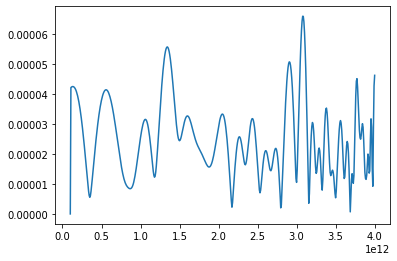

In [5]:
pl.figure()
pl.plot(F_thz,np.abs(G[1,:]))
pl.show()